In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "C:/Users/tejas/Downloads/flight dataset/Clean_Dataset.csv"
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("Dataset Preview:")
print(data.head())

# Step 1: Data Cleaning
# Assuming the dataset contains 'Portfolio Value' and 'Date' columns
# Rename columns for clarity (adjust based on your dataset structure)
data.columns = ['Date', 'Portfolio_Value']
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
data = data.dropna()

# Ensure Portfolio_Value is numeric
data['Portfolio_Value'] = pd.to_numeric(data['Portfolio_Value'], errors='coerce')
data = data.dropna()

# Step 2: Calculate Portfolio Returns
data['Return'] = data['Portfolio_Value'].pct_change()
data = data.dropna()

# Step 3: Calculate VaR and Expected Shortfall
confidence_level = 0.95
var = np.percentile(data['Return'], (1 - confidence_level) * 100)
expected_shortfall = data['Return'][data['Return'] <= var].mean()

print(f"Value at Risk (VaR) at {confidence_level*100}% confidence: {var:.4f}")
print(f"Expected Shortfall (ES): {expected_shortfall:.4f}")

# Step 4: Visualization
sns.histplot(data['Return'], bins=50, kde=True, color='blue', label='Returns Distribution')
plt.axvline(var, color='red', linestyle='--', label=f'VaR ({var:.4f})')
plt.axvline(expected_shortfall, color='green', linestyle='--', label=f'ES ({expected_shortfall:.4f})')
plt.title('Portfolio Returns Distribution with VaR and ES')
plt.xlabel('Portfolio Returns')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Step 5: Save Results
output_path = '/mnt/data/Processed_Data.csv'
data.to_csv(output_path, index=False)
print(f"Processed data saved to: {output_path}")


Dataset Preview:
   Unnamed: 0   airline   flight source_city departure_time stops  \
0           0  SpiceJet  SG-8709       Delhi        Evening  zero   
1           1  SpiceJet  SG-8157       Delhi  Early_Morning  zero   
2           2   AirAsia   I5-764       Delhi  Early_Morning  zero   
3           3   Vistara   UK-995       Delhi        Morning  zero   
4           4   Vistara   UK-963       Delhi        Morning  zero   

    arrival_time destination_city    class  duration  days_left  price  
0          Night           Mumbai  Economy      2.17          1   5953  
1        Morning           Mumbai  Economy      2.33          1   5953  
2  Early_Morning           Mumbai  Economy      2.17          1   5956  
3      Afternoon           Mumbai  Economy      2.25          1   5955  
4        Morning           Mumbai  Economy      2.33          1   5955  


ValueError: Length mismatch: Expected axis has 12 elements, new values have 2 elements

Dataset Preview:
   Unnamed: 0   airline   flight source_city departure_time stops  \
0           0  SpiceJet  SG-8709       Delhi        Evening  zero   
1           1  SpiceJet  SG-8157       Delhi  Early_Morning  zero   
2           2   AirAsia   I5-764       Delhi  Early_Morning  zero   
3           3   Vistara   UK-995       Delhi        Morning  zero   
4           4   Vistara   UK-963       Delhi        Morning  zero   

    arrival_time destination_city    class  duration  days_left  price  
0          Night           Mumbai  Economy      2.17          1   5953  
1        Morning           Mumbai  Economy      2.33          1   5953  
2  Early_Morning           Mumbai  Economy      2.17          1   5956  
3      Afternoon           Mumbai  Economy      2.25          1   5955  
4        Morning           Mumbai  Economy      2.33          1   5955  
Value at Risk (VaR) at 95.0% confidence: -0.0001
Expected Shortfall (ES): -0.1656


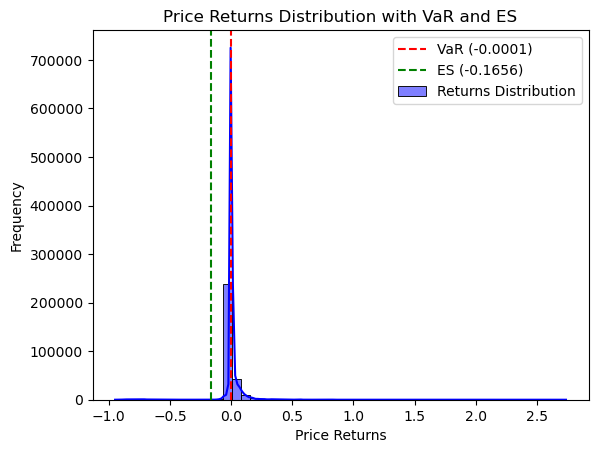

Processed data saved to: C:/Users/tejas/Downloads/flight dataset/Processed_Data.csv


In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "C:/Users/tejas/Downloads/flight dataset/Clean_Dataset.csv"
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("Dataset Preview:")
print(data.head())

# Step 1: Data Cleaning
# Focus on the 'price' column for financial analysis
if 'price' not in data.columns:
    raise ValueError("The dataset must contain a 'price' column for analysis.")

# Ensure 'price' is numeric
data['price'] = pd.to_numeric(data['price'], errors='coerce')
data = data.dropna(subset=['price'])

# Step 2: Calculate Returns
data['Price_Return'] = data['price'].pct_change()
data = data.dropna()

# Step 3: Calculate VaR and Expected Shortfall
confidence_level = 0.95
var = np.percentile(data['Price_Return'], (1 - confidence_level) * 100)
expected_shortfall = data['Price_Return'][data['Price_Return'] <= var].mean()

print(f"Value at Risk (VaR) at {confidence_level*100}% confidence: {var:.4f}")
print(f"Expected Shortfall (ES): {expected_shortfall:.4f}")

# Step 4: Visualization
sns.histplot(data['Price_Return'], bins=50, kde=True, color='blue', label='Returns Distribution')
plt.axvline(var, color='red', linestyle='--', label=f'VaR ({var:.4f})')
plt.axvline(expected_shortfall, color='green', linestyle='--', label=f'ES ({expected_shortfall:.4f})')
plt.title('Price Returns Distribution with VaR and ES')
plt.xlabel('Price Returns')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Step 5: Save Results
output_path = "C:/Users/tejas/Downloads/flight dataset/Processed_Data.csv"
data.to_csv(output_path, index=False)
print(f"Processed data saved to: {output_path}")
